multiple linear regression


> To detect the price based on



> carat (weight of diamond)

> cut(quality of the cut =fair,good,very good,premium,ideal)

> color( d=best to j =worst)

>x=lendth in mm

>y=width in mm

>z depth in mm





In [1]:
import pandas as pd

In [2]:
df=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/internshala/M6_T2_V1_Diamonds.csv"))

In [3]:
df

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


**EXPLORATORY DATA ANALYSIS**

In [6]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

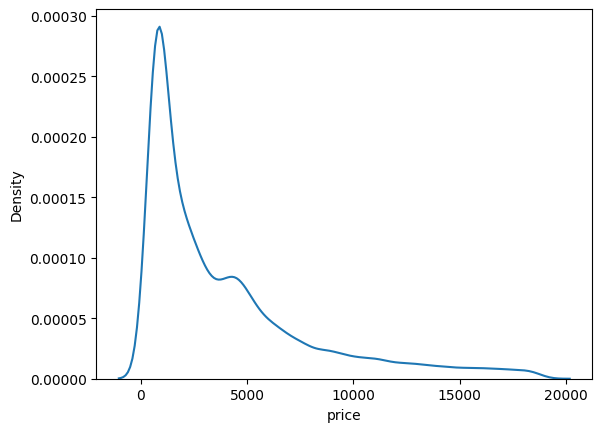

In [7]:
sns.kdeplot(df.price)

Distribution need to be normal to construct linear model

In [8]:
import matplotlib.pyplot as plt

In [9]:
def coln(col):
  m=1
  fig=plt.figure(figsize=(30,8))
  for i in col:
      plt.subplot(1,3,m)
      sns.scatterplot(x=df[i],y=df.price)
      m+=1


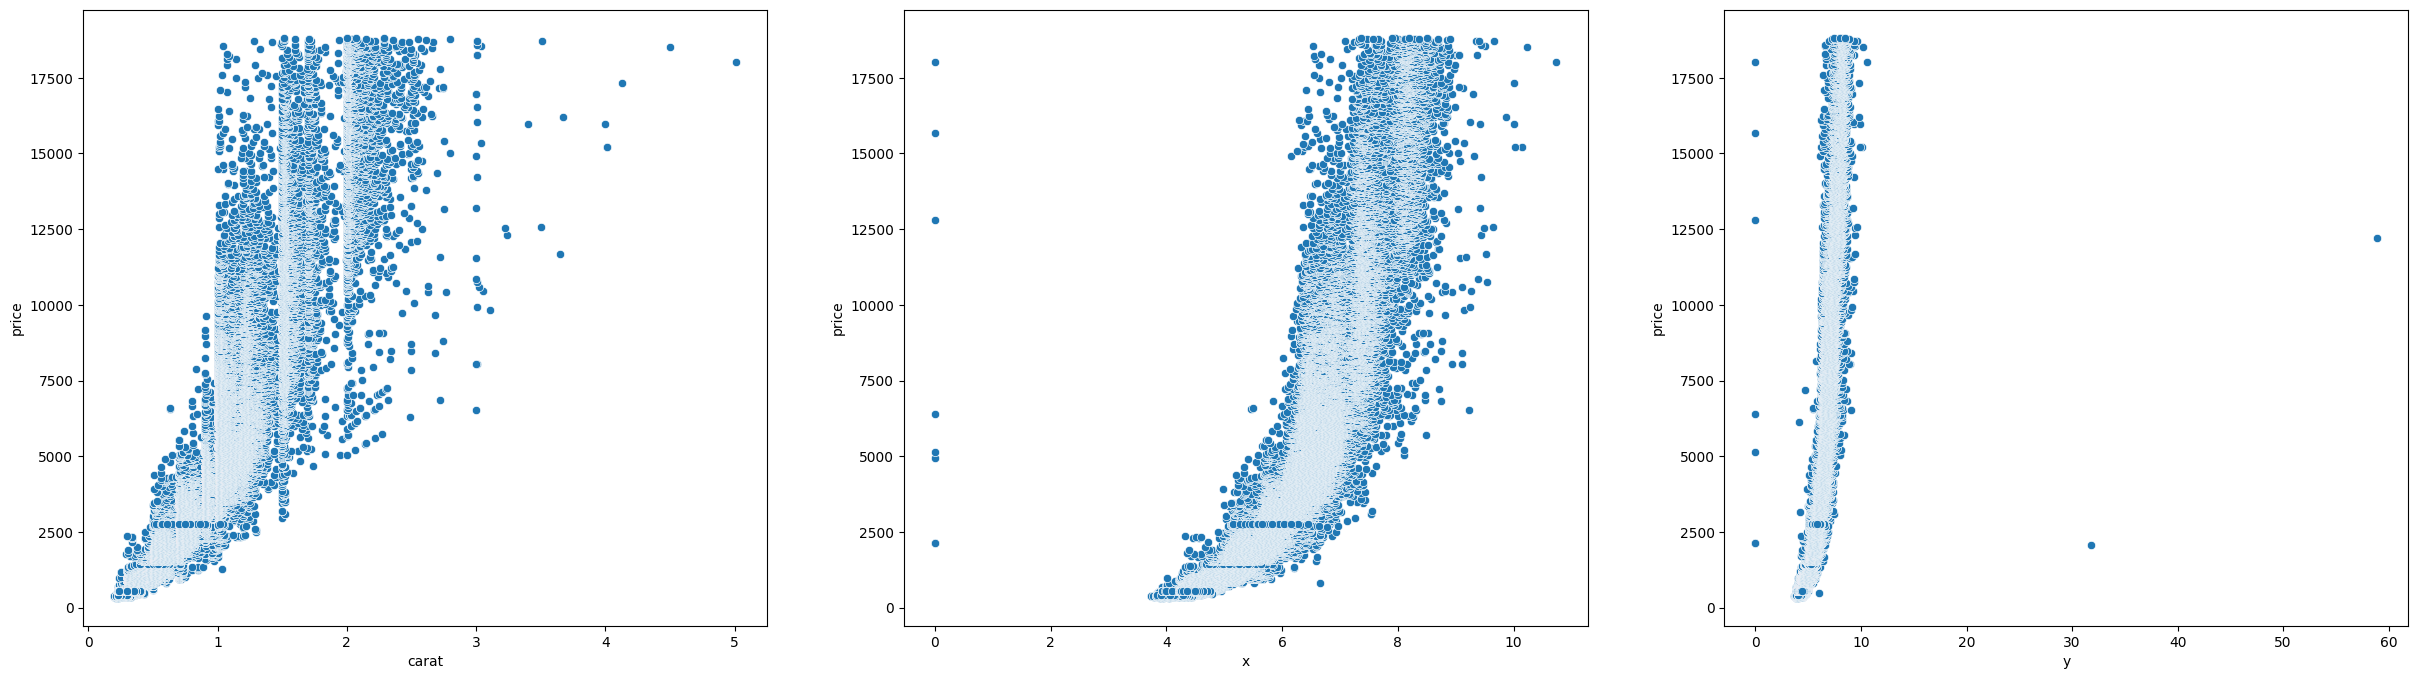

In [10]:
coln(["carat","x","y"])

In [11]:
formula="price~carat+cut+color+clarity+x+y+z"

In [12]:
from statsmodels.formula.api import ols

In [13]:
lm=ols(formula,df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 2.931e+04
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        04:52:49   Log-Likelihood:            -4.5584e+05
No. Observations:               53940   AIC:                         9.117e+05
Df Residuals:                   53918   BIC:                         9.119e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3642.4909     91.784    -39.686      0.000   -3822.388   -3462.594
cut[T.Good]        671.0546     33.078     20.287      0.000     606.222     735.887
cut[T.Ideal]      1027.6687     30.293     33.925      0.000     968.295    1087.043
cut[T.Premium]     907.8561     30.708     29.564      0.000     847.669     968.044
cut[T.Very Good]   866.7948     30.860     28.088      0.000     806.309     927.281
color[T.E]        -209.0244     17.928    -11.659      0.000    -244.164    -173.885
color[T.F]        -273.6044     18.128    -15.093      0.000    -309.135    -238.074
color[T.G]        -486.1915     17.743    -27.401      0.000    -520.968    -451.414
color[T.H]        -986.0796     18.865    -52.269      0.000   -1023.056    -949.103
color[T.I]       -1472.1112     21.200    -69.440      0.000   -1513.663   -1430.560
color[T.J]       -2374.8829     26.180    -90.714      0.000   -2426.196   -2323.570
clarity[T.IF]     5386.2861     51.045    105.520      0.000    5286.237    5486.335
clarity[T.SI1]    3678.3986     43.712     84.152      0.000    3592.724    3764.074
clarity[T.SI2]    2719.6723     43.889     61.967      0.000    2633.650    2805.695
clarity[T.VS1]    4603.1027     44.601    103.207      0.000    4515.685    4690.520
clarity[T.VS2]    4286.4549     43.920     97.597      0.000    4200.372    4372.538
clarity[T.VVS1]   5039.0561     47.201    106.758      0.000    4946.543    5131.570
clarity[T.VVS2]   4978.3146     45.905    108.449      0.000    4888.341    5068.288
carat             1.113e+04     47.713    233.255      0.000     1.1e+04    1.12e+04
x                 -869.6540     30.618    -28.403      0.000    -929.666    -809.642
y                   32.2006     19.296      1.669      0.095      -5.619      70.021
z                 -227.6954     29.721     -7.661      0.000    -285.949    -169.442
==============================================================================
Omnibus:                    14526.359   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           527551.029
Skew:                           0.613   Prob(JB):                         0.00
Kurtosis:                      18.272   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df["ypred"]=lm.predict(df)

<Axes: xlabel='price', ylabel='ypred'>

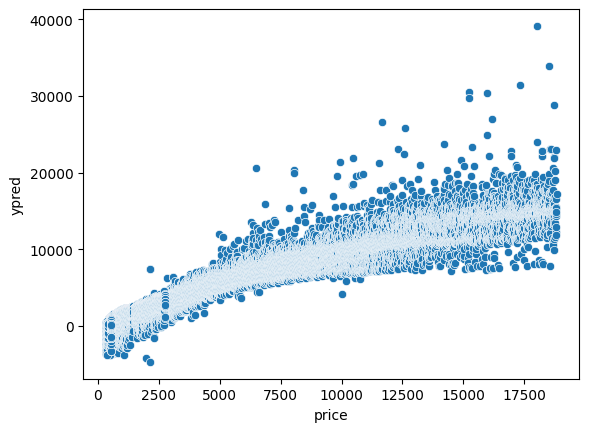

In [15]:
sns.scatterplot(x=df.price,y=df.ypred)

In [16]:
df["resid"]=df.price-df.ypred

<Axes: xlabel='resid', ylabel='Density'>

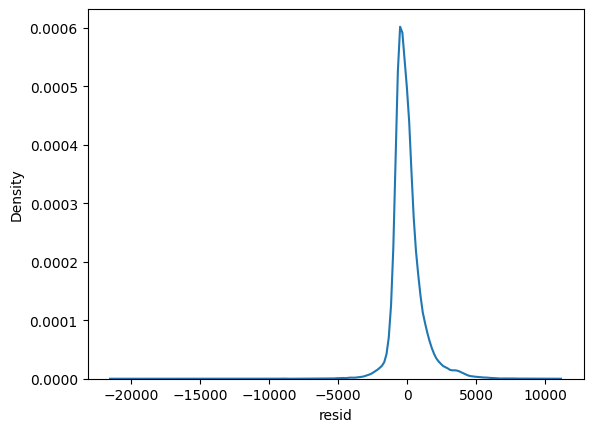

In [17]:
sns.kdeplot(df.resid)

> r2 square value is 0.91 which is quite really good but it may have  a great impact in business point of view



> So the price is exponential in order to make it normal we can take log for price column



In [18]:
import numpy as np

<Axes: xlabel='logprice', ylabel='Density'>

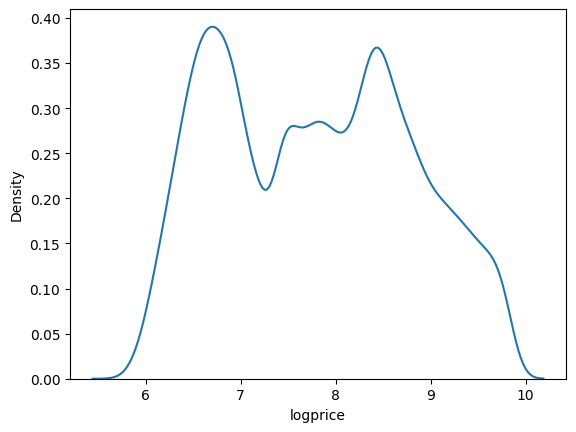

In [19]:
df["logprice"]=np.log(df.price)
sns.kdeplot(df.logprice)

In [20]:
formula="logprice~carat+cut+color+clarity+x+y+z"

In [21]:
lm=ols(formula,df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 7.523e+04
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        04:52:53   Log-Likelihood:                 14679.
No. Observations:               53940   AIC:                        -2.931e+04
Df Residuals:                   53918   BIC:                        -2.912e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8943      0.015     59.843      0.000       0.865       0.924
cut[T.Good]          0.0230      0.005      4.266      0.000       0.012       0.034
cut[T.Ideal]         0.0378      0.005      7.669      0.000       0.028       0.047
cut[T.Premium]      -0.0007      0.005     -0.143      0.886      -0.011       0.009
cut[T.Very Good]     0.0261      0.005      5.193      0.000       0.016       0.036
color[T.E]          -0.0589      0.003    -20.176      0.000      -0.065      -0.053
color[T.F]          -0.0881      0.003    -29.851      0.000      -0.094      -0.082
color[T.G]          -0.1524      0.003    -52.753      0.000      -0.158      -0.147
color[T.H]          -0.2524      0.003    -82.173      0.000      -0.258      -0.246
color[T.I]          -0.3795      0.003   -109.956      0.000      -0.386      -0.373
color[T.J]          -0.5199      0.004   -121.979      0.000      -0.528      -0.512
clarity[T.IF]        1.0628      0.008    127.884      0.000       1.047       1.079
clarity[T.SI1]       0.5976      0.007     83.968      0.000       0.584       0.612
clarity[T.SI2]       0.4270      0.007     59.753      0.000       0.413       0.441
clarity[T.VS1]       0.7985      0.007    109.956      0.000       0.784       0.813
clarity[T.VS2]       0.7349      0.007    102.768      0.000       0.721       0.749
clarity[T.VVS1]      0.9790      0.008    127.395      0.000       0.964       0.994
clarity[T.VVS2]      0.9158      0.007    122.534      0.000       0.901       0.930
carat               -0.4988      0.008    -64.204      0.000      -0.514      -0.484
x                    1.0299      0.005    206.598      0.000       1.020       1.040
y                    0.0129      0.003      4.096      0.000       0.007       0.019
z                    0.2149      0.005     44.406      0.000       0.205       0.224
==============================================================================
Omnibus:                    94647.497   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        761932489.861
Skew:                          11.680   Prob(JB):                         0.00
Kurtosis:                     584.780   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='carat', ylabel='logprice'>

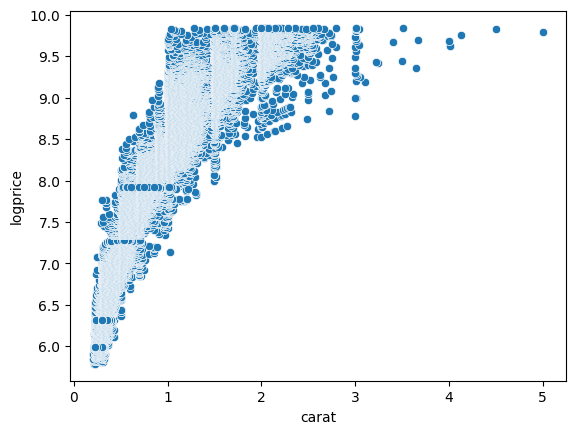

In [22]:
sns.scatterplot(x=df.carat,y=df.logprice)

In [23]:
df["ypred1"]=lm.predict(df)

In [24]:
df["logres"]=df.logprice-df.ypred1

<Axes: xlabel='logres', ylabel='Density'>

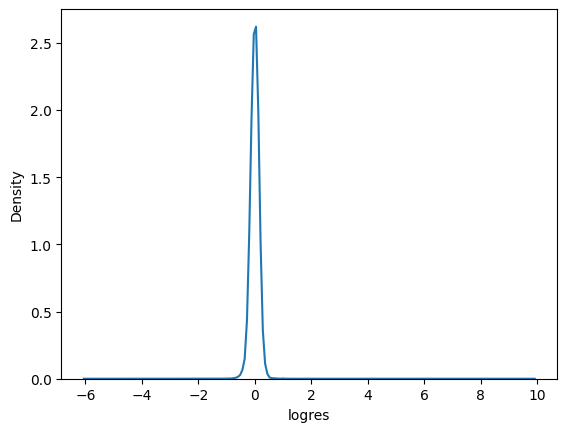

In [26]:
sns.kdeplot(df.logres)